In [ ]:
import os
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST)
print(path)

In [3]:
files = get_image_files(path/"training")
print(len(files))
print(files[0])

60000
/Users/ashish.jha/.fastai/data/mnist_png/training/9/36655.png


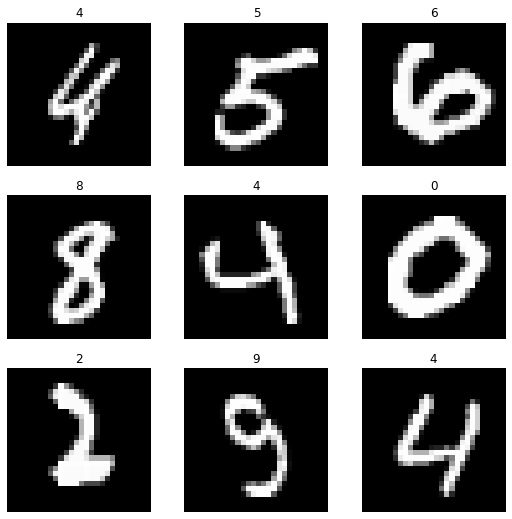

In [4]:
def label_func(f): return f.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames=files, label_func=label_func)
dls.show_batch()

In [5]:
learn = cnn_learner(dls, arch=resnet18, metrics=accuracy)

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.009120108559727669)

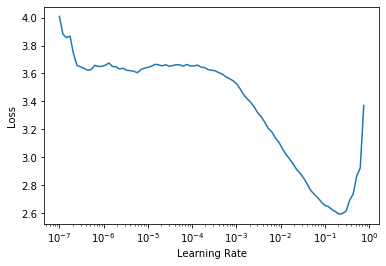

In [6]:
learn.lr_find()

In [7]:
learn.fine_tune(epochs=2, base_lr=0.0209, freeze_epochs=1)

epoch,train_loss,valid_loss,accuracy,time
0,0.281835,0.199095,0.946417,08:30


epoch,train_loss,valid_loss,accuracy,time
0,0.122436,0.080322,0.982583,10:24
1,0.033702,0.027708,0.991833,08:32


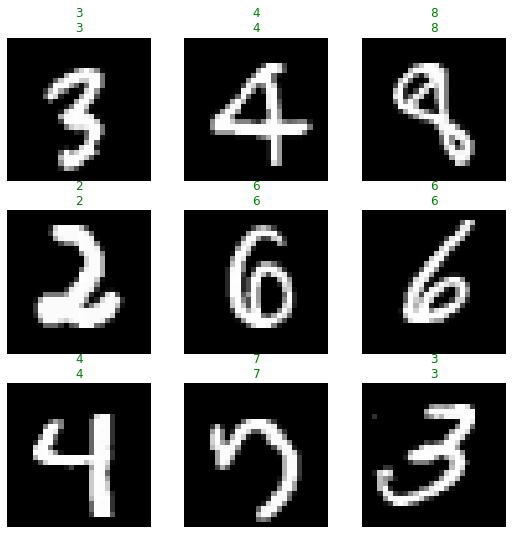

In [8]:
learn.show_results()

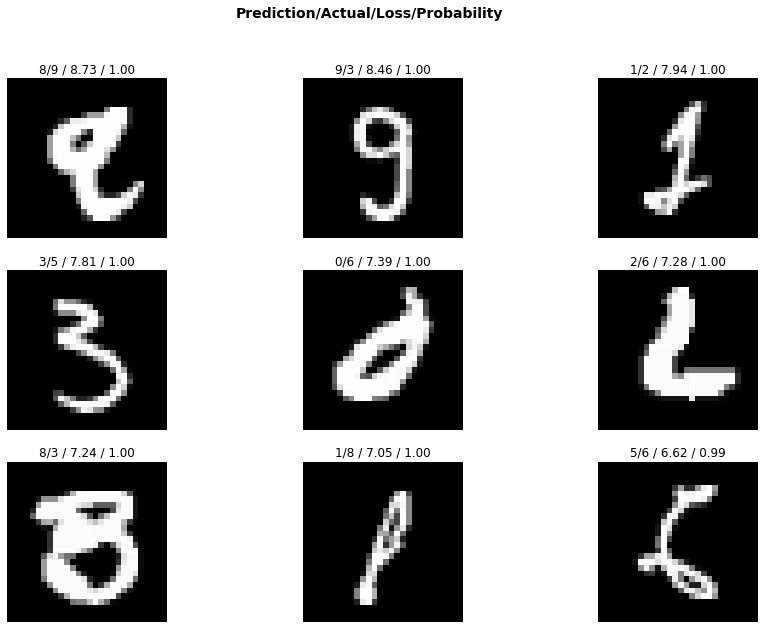

In [9]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

In [11]:
ddd = pd.read_csv("/Users/ashish.jha/Downloads/polish_ids.csv")

In [16]:
import random
random.shuffle(ddd["labelling_id"].drop_duplicates().tolist())